    Notebook Description
    
    In this notebook, I will be exploring the sample generated datasets from sklearn by fitting them with 
    KMeans and the different Agglomerative clustering algorithms. The aim of this task is to study the different
    algorithms in terms of how they cluster the data.

`1. Imports`
    * PyData libs (NumPy, Pandas, Seaborn, Matplotlib)
    * ML libs (Sklearn)
   
   
`2. Import Datasets` (Sklearn - generated samples


`3. Visualize Sample Datasets`
    * Gaussian Distribution
    * Half-moons Distribution
    * Circles Distribution
    * Clustered Distribution
    
`4. Fit Clustering Algo's on datasets`
    * KMeans
    * Single-link
    
`5. Study and compare algorithms`
    * Gaussian Distribution
        * KMeans Predictions
        * Single-link Predictions
    * Moons Distribution
        * KMeans Predictions
        * Single-link Predictions

`Imports Libs`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
sns.set_style('darkgrid')

In [3]:
from sklearn.cluster import KMeans # KMeans Algorithms
from sklearn.cluster import AgglomerativeClustering # Agglomerative Algorithms

`Import Datasets`

In [4]:
from sklearn import datasets

`Visualize Sample Datasets`

In [108]:
# Import dataset with gaussian distribution
gaussian_features, gaussian_labels = datasets.make_gaussian_quantiles(n_samples=500, random_state=42)

# Import dataset with two-half moons
moons_features, moons_labels = datasets.make_moons(n_samples=150, random_state=42)

# Import dataset with circles 
circles_features, circles_labels = datasets.make_circles(n_samples=250, random_state=42)

# Importing dataset with clusters
cluster_features, cluster_labels = datasets.make_blobs(n_samples=250, n_features=3)

In [126]:
# Function creates a scatterplot in two dimensions

def visualize_scatter_2D(data, title, hue=None):
    
    fig = plt.figure(figsize=(8, 5)) # Setting the figure size
    ax = sns.scatterplot(x=data[:,0], y=data[:, 1], hue=hue) # Scatterplot
    
    # Graph Attributes
    plt.title(title)
    plt.ylabel('Y')
    plt.xlabel('X')

In [128]:
from mpl_toolkits.mplot3d import Axes3D

def visualize_scatter_3D(data, title, color=None):
    
    fig = plt.figure(figsize=(12, 8)) # Figure Size
    ax = plt.subplot(111, projection='3d') # Creating Axis
    
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=color)
    
    plt.title(title)

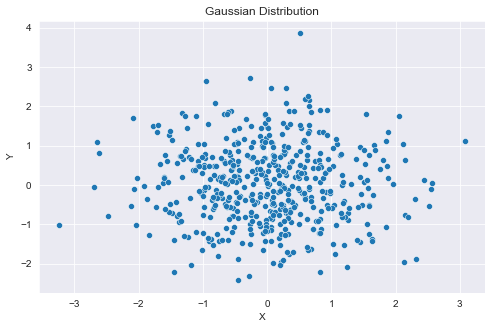

In [121]:
# Gaussian Distribution Visual
visualize_scatter_2D(data=gaussian_features, title='Gaussian Distribution')

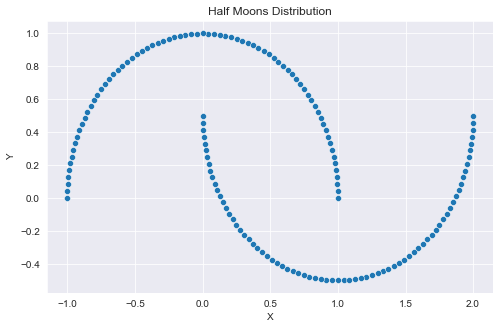

In [122]:
# Two-Half Moons
visualize_scatter_2D(data=moons_features, title='Half Moons Distribution')

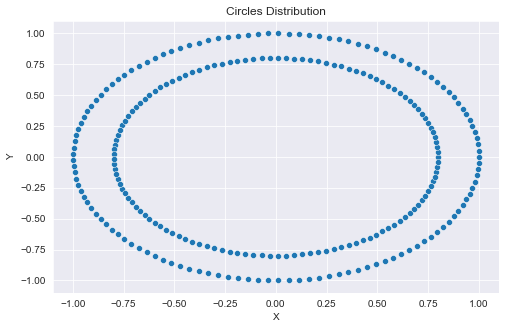

In [123]:
# Circles Visual
visualize_scatter_2D(data=circles_features, title='Circles Distribution')

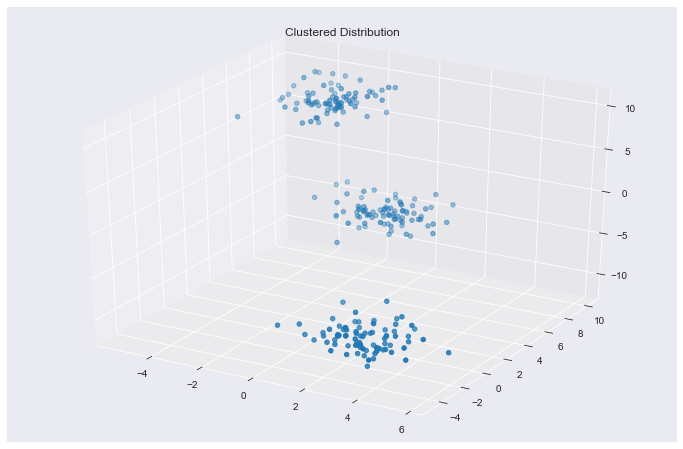

In [125]:
# Clusters Visual
visualize_scatter_3D(data=cluster_features, title='Clustered Distribution')

`Fit Clustering Algorithms`

    a) KMeans - We will start by fitting the KMeans clustering algorithm on all 4 datasets.
    b) Agglomerative Clustering - Here we will fit the single link algorithm

`KMeans`

In [168]:
# KMeans

def KMeans_algorithm(data):
    k_means = KMeans(n_clusters=2, random_state=10) # Create an instance of model
    predictions = k_means.fit_predict(data) # Fit and cluster data
    return predictions

In [169]:
# List of datasets
datasets_features = [gaussian_features, moons_features, circles_features, cluster_features]
datasets_name = ['Gaussian', 'Half-moons', 'Circles', 'Clustered']

# Dictionary of predictions
datasets_predictions_KMeans = {}

index = 0
while index < len(datasets_features):
    predictions = KMeans_algorithm(data=datasets_features[index])
    datasets_predictions_KMeans[datasets_name[index]] = predictions
    index += 1

`Single-link`

In [170]:
# Single-link

def single_link_clustering_algorithm(data):
    single_link = AgglomerativeClustering(n_clusters=2, linkage='single') # Creating an instance of model
    predictions = single_link.fit_predict(data)
    return predictions

In [171]:
# Dictionary to keep predictions
datasets_predictions_single_link = {}

index = 0
while index < len(datasets_features):
    predictions = single_link_clustering_algorithm(data=datasets_features[index])
    datasets_predictions_single_link[datasets_name[index]] = predictions
    index += 1

`Study and compare algorithms`

`a) Gaussian Distribution`

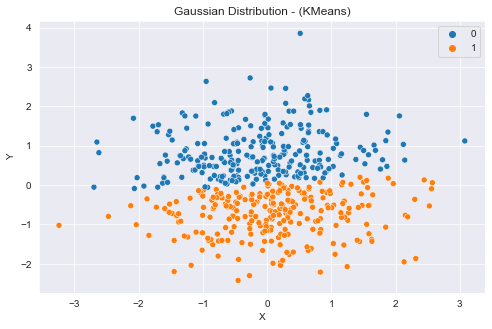

In [172]:
# KMeans
visualize_scatter_2D(
    data=gaussian_features, 
    title='Gaussian Distribution - (KMeans)', 
    hue=datasets_predictions_KMeans['Gaussian'],
)

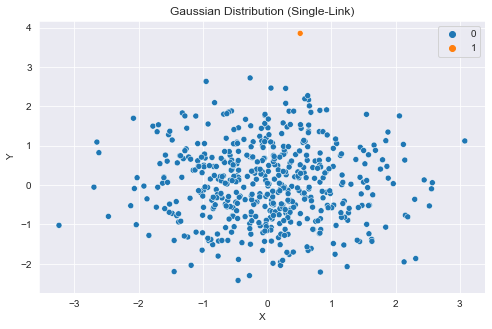

In [173]:
# Single-link
visualize_scatter_2D(
    data=gaussian_features, 
    title='Gaussian Distribution (Single-Link)', 
    hue=datasets_predictions_single_link['Gaussian'],
)

`b) Half-Moons Distribution`

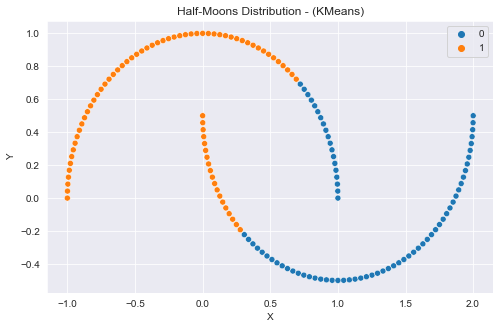

In [174]:
# KMeans
visualize_scatter_2D(
    data=moons_features, 
    title='Half-Moons Distribution - (KMeans)', 
    hue=datasets_predictions_KMeans['Half-moons'],
)

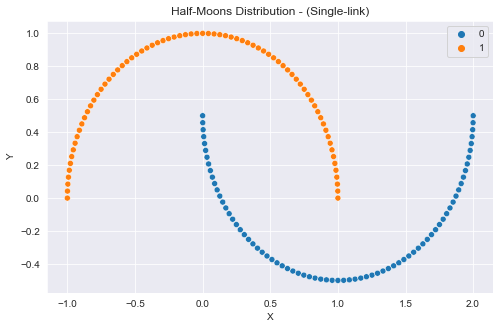

In [175]:
# Single-link
visualize_scatter_2D(
    data=moons_features, 
    title='Half-Moons Distribution - (Single-link)', 
    hue=datasets_predictions_single_link['Half-moons'],
)